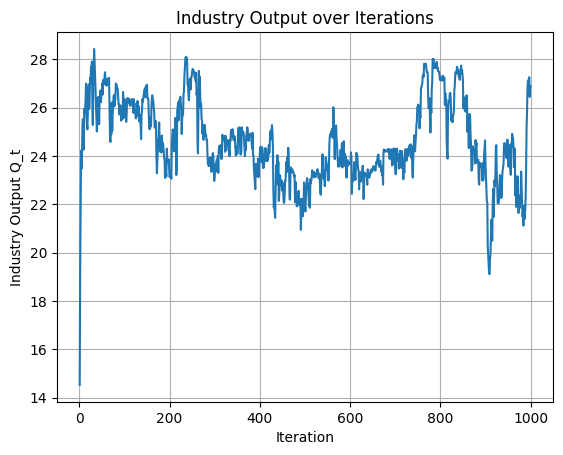

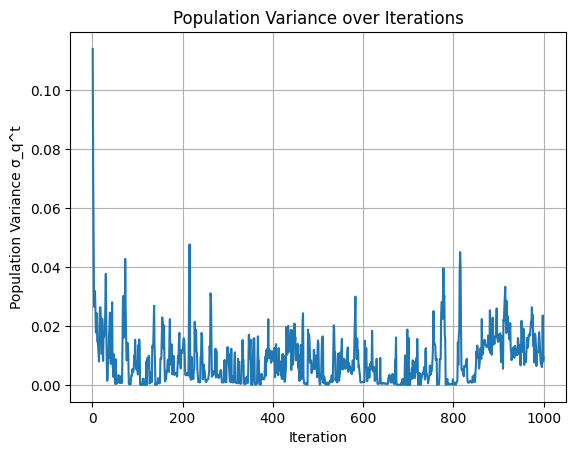

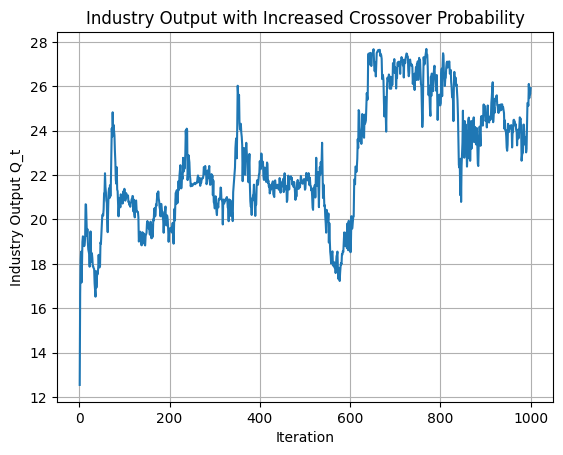

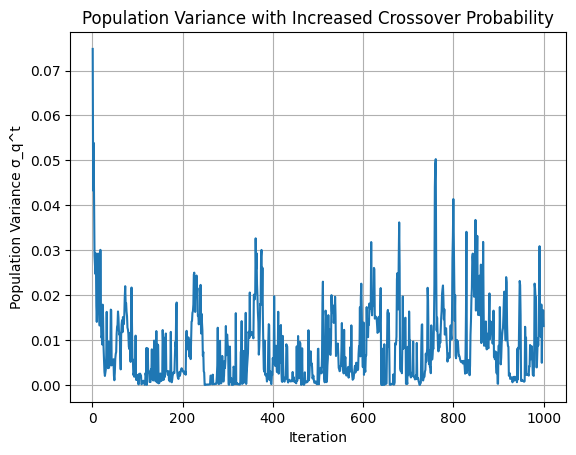

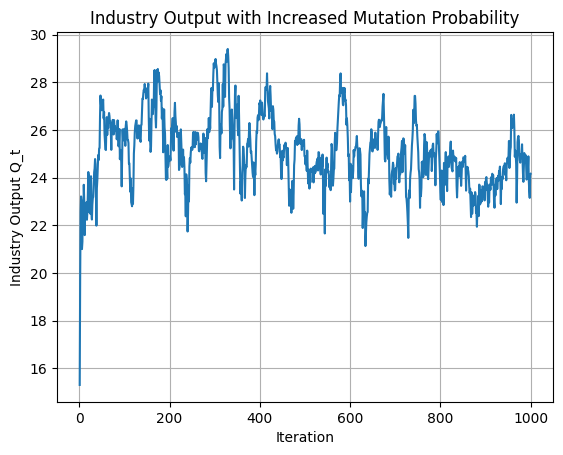

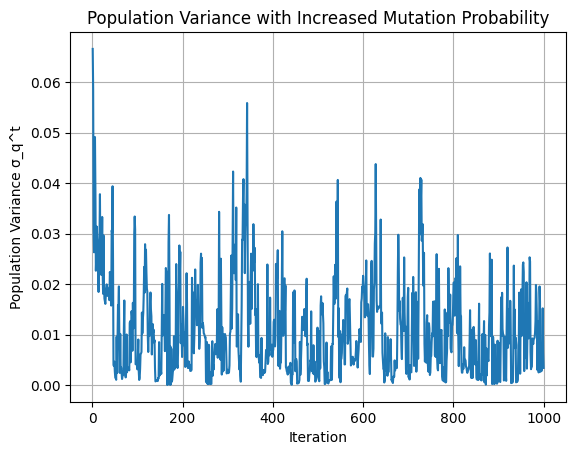

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
n = 30  # Number of firms
c = 0  # Cost parameter
l = 10  # Length of binary strings
T = 1000  # Number of iterations
alpha = 1  # Constant term in demand function

# Extract student-specific parameters
Y = 12  # Replace with the second-to-last digit of your student ID
Z = 4   # Replace with the last digit of your student ID

b = (-1)**Z * (0.50 + 0.01 * Y)  # Degree of substitution/complementarity
pcross = 0.300 + (0.01 * Y + 0.001 * Z)  # Crossover probability
pmut = 0.00300 + (0.0001 * Y + 0.00001 * Z)  # Mutation probability

# Genetic Algorithm functions
def initialize_population(n, l):
    return np.random.randint(2, size=(n, l))

def decode_chromosome(chromosome):
    return int(''.join(map(str, chromosome)), 2) / (2**l - 1)

def fitness_function(q, b, c):
    return q * (alpha - b * q) - c * q

def select_parents(population, fitness):
    probabilities = fitness / fitness.sum()
    indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[indices]

def crossover(parent1, parent2, pcross):
    if np.random.rand() < pcross:
        point = np.random.randint(1, len(parent1))
        return np.concatenate((parent1[:point], parent2[point:])), np.concatenate((parent2[:point], parent1[point:]))
    return parent1, parent2

def mutate(chromosome, pmut):
    for i in range(len(chromosome)):
        if np.random.rand() < pmut:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

# Main GA simulation
population = initialize_population(n, l)
industry_outputs = []
population_variances = []

for t in range(T):
    # Decode population to output levels
    outputs = np.array([decode_chromosome(chromosome) for chromosome in population])

    # Calculate fitness
    fitness = fitness_function(outputs, b, c)

    # Store metrics
    industry_outputs.append(outputs.sum())
    population_variances.append(np.var(outputs))

    # Select parents
    parents = select_parents(population, fitness)

    # Apply crossover
    new_population = []
    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[(i + 1) % len(parents)]
        child1, child2 = crossover(parent1, parent2, pcross)
        new_population.extend([child1, child2])

    # Apply mutation
    population = np.array([mutate(chromosome, pmut) for chromosome in new_population])

# Plot results
plt.figure()
plt.plot(range(1, T + 1), industry_outputs)
plt.title("Industry Output over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Industry Output Q_t")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(1, T + 1), population_variances)
plt.title("Population Variance over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Population Variance σ_q^t")
plt.grid()
plt.show()

# Adjust for part (iii) and (iv)
def run_adjusted_simulation(pcross_adjusted=None, pmut_adjusted=None):
    adjusted_population = initialize_population(n, l)
    adjusted_industry_outputs = []
    adjusted_population_variances = []

    for t in range(T):
        outputs = np.array([decode_chromosome(chromosome) for chromosome in adjusted_population])
        fitness = fitness_function(outputs, b, c)

        adjusted_industry_outputs.append(outputs.sum())
        adjusted_population_variances.append(np.var(outputs))

        parents = select_parents(adjusted_population, fitness)
        new_population = []

        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[(i + 1) % len(parents)]
            child1, child2 = crossover(parent1, parent2, pcross_adjusted or pcross)
            new_population.extend([child1, child2])

        adjusted_population = np.array([mutate(chromosome, pmut_adjusted or pmut) for chromosome in new_population])

    return adjusted_industry_outputs, adjusted_population_variances

# (iii) Increase crossover probability
adjusted_pcross = pcross + 0.200
outputs_pcross, variances_pcross = run_adjusted_simulation(pcross_adjusted=adjusted_pcross)

# (iv) Increase mutation probability
adjusted_pmut = pmut + 0.002
outputs_pmut, variances_pmut = run_adjusted_simulation(pmut_adjusted=adjusted_pmut)

# Plot for (iii)
plt.figure()
plt.plot(range(1, T + 1), outputs_pcross)
plt.title("Industry Output with Increased Crossover Probability")
plt.xlabel("Iteration")
plt.ylabel("Industry Output Q_t")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(1, T + 1), variances_pcross)
plt.title("Population Variance with Increased Crossover Probability")
plt.xlabel("Iteration")
plt.ylabel("Population Variance σ_q^t")
plt.grid()
plt.show()

# Plot for (iv)
plt.figure()
plt.plot(range(1, T + 1), outputs_pmut)
plt.title("Industry Output with Increased Mutation Probability")
plt.xlabel("Iteration")
plt.ylabel("Industry Output Q_t")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(1, T + 1), variances_pmut)
plt.title("Population Variance with Increased Mutation Probability")
plt.xlabel("Iteration")
plt.ylabel("Population Variance σ_q^t")
plt.grid()
plt.show()


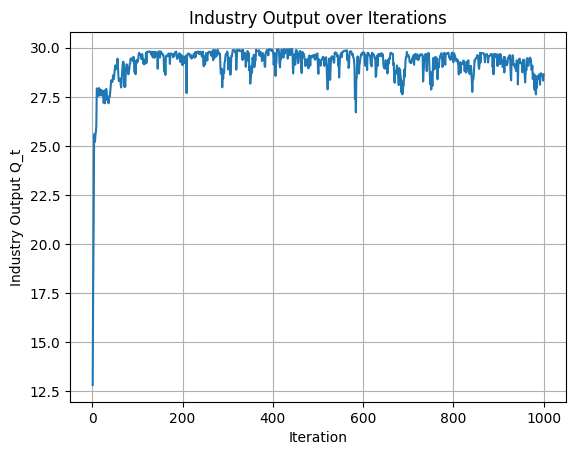

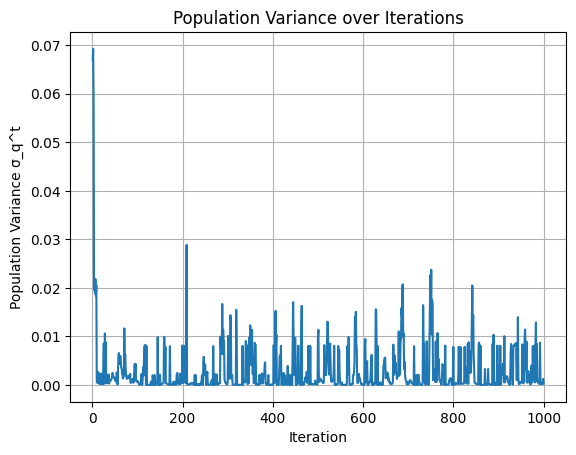

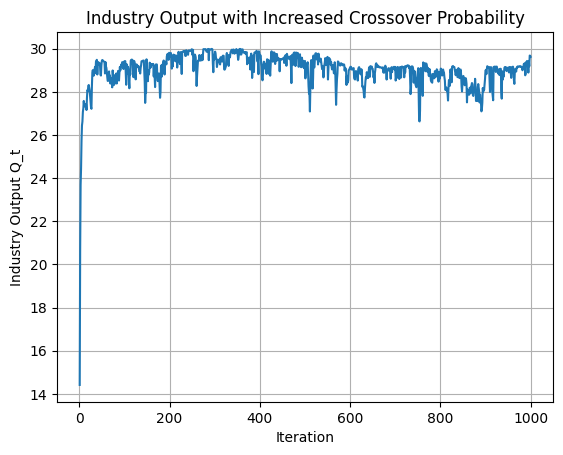

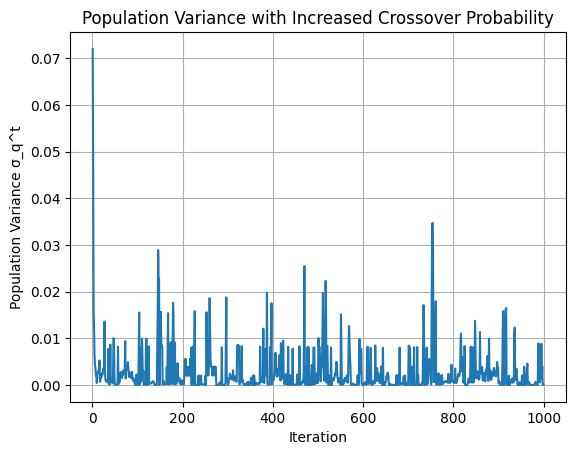

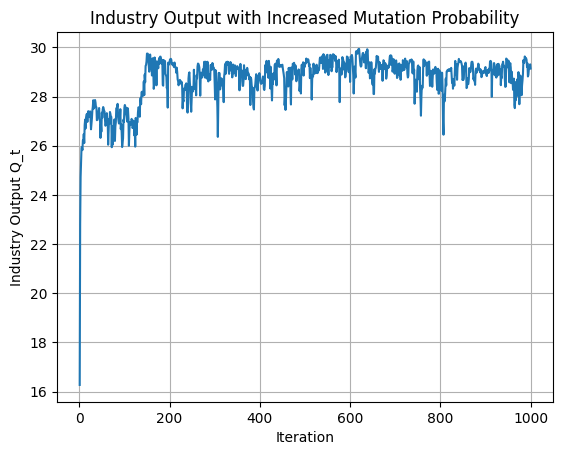

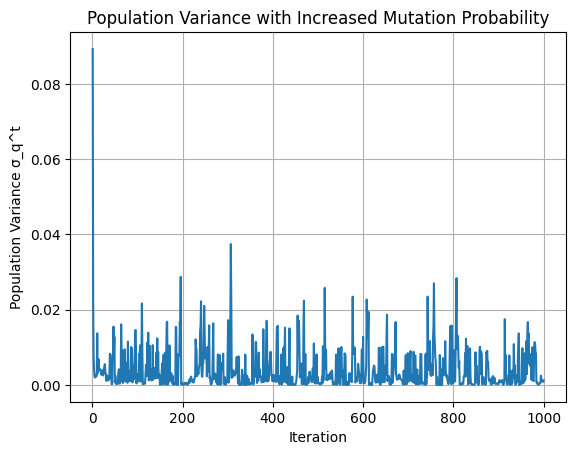

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 30
c = 0
l = 10
T = 1000
alpha = 1

Y = 2
Z = 1

b = (-1)**Z * (0.50 + 0.01 * Y)
pcross = 0.300 + (0.01 * Y + 0.001 * Z)
pmut = 0.00300 + (0.0001 * Y + 0.00001 * Z)

def initialize_population(n, l):
    return np.random.randint(2, size=(n, l))

def decode_chromosome(chromosome):
    return int(''.join(map(str, chromosome)), 2) / (2**l - 1)

def fitness_function(q, b, c):
    return q * (alpha - b * q) - c * q

def select_parents(population, fitness):
    probabilities = fitness / fitness.sum()
    indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[indices]

def crossover(parent1, parent2, pcross):
    if np.random.rand() < pcross:
        point = np.random.randint(1, len(parent1))
        return np.concatenate((parent1[:point], parent2[point:])), np.concatenate((parent2[:point], parent1[point:]))
    return parent1, parent2

def mutate(chromosome, pmut):
    for i in range(len(chromosome)):
        if np.random.rand() < pmut:
            chromosome[i] = 1 - chromosome[i]
    return chromosome

population = initialize_population(n, l)
industry_outputs = []
population_variances = []

for t in range(T):
    outputs = np.array([decode_chromosome(chromosome) for chromosome in population])

    fitness = fitness_function(outputs, b, c)

    industry_outputs.append(outputs.sum())
    population_variances.append(np.var(outputs))

    parents = select_parents(population, fitness)

    new_population = []
    for i in range(0, len(parents), 2):
        parent1, parent2 = parents[i], parents[(i + 1) % len(parents)]
        child1, child2 = crossover(parent1, parent2, pcross)
        new_population.extend([child1, child2])
    population = np.array([mutate(chromosome, pmut) for chromosome in new_population])

plt.figure()
plt.plot(range(1, T + 1), industry_outputs)
plt.title("Industry Output over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Industry Output Q_t")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(1, T + 1), population_variances)
plt.title("Population Variance over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Population Variance σ_q^t")
plt.grid()
plt.show()

def run_adjusted_simulation(pcross_adjusted=None, pmut_adjusted=None):
    adjusted_population = initialize_population(n, l)
    adjusted_industry_outputs = []
    adjusted_population_variances = []

    for t in range(T):
        outputs = np.array([decode_chromosome(chromosome) for chromosome in adjusted_population])
        fitness = fitness_function(outputs, b, c)

        adjusted_industry_outputs.append(outputs.sum())
        adjusted_population_variances.append(np.var(outputs))

        parents = select_parents(adjusted_population, fitness)
        new_population = []

        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[(i + 1) % len(parents)]
            child1, child2 = crossover(parent1, parent2, pcross_adjusted or pcross)
            new_population.extend([child1, child2])

        adjusted_population = np.array([mutate(chromosome, pmut_adjusted or pmut) for chromosome in new_population])

    return adjusted_industry_outputs, adjusted_population_variances

adjusted_pcross = pcross + 0.200
outputs_pcross, variances_pcross = run_adjusted_simulation(pcross_adjusted=adjusted_pcross)

adjusted_pmut = pmut + 0.002
outputs_pmut, variances_pmut = run_adjusted_simulation(pmut_adjusted=adjusted_pmut)

plt.figure()
plt.plot(range(1, T + 1), outputs_pcross)
plt.title("Industry Output with Increased Crossover Probability")
plt.xlabel("Iteration")
plt.ylabel("Industry Output Q_t")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(1, T + 1), variances_pcross)
plt.title("Population Variance with Increased Crossover Probability")
plt.xlabel("Iteration")
plt.ylabel("Population Variance σ_q^t")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(1, T + 1), outputs_pmut)
plt.title("Industry Output with Increased Mutation Probability")
plt.xlabel("Iteration")
plt.ylabel("Industry Output Q_t")
plt.grid()
plt.show()

plt.figure()
plt.plot(range(1, T + 1), variances_pmut)
plt.title("Population Variance with Increased Mutation Probability")
plt.xlabel("Iteration")
plt.ylabel("Population Variance σ_q^t")
plt.grid()
plt.show()